In [1]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib
# import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# from yaspin import yaspin
from scipy.stats import loguniform
# from sklearn_evaluation import plot
from sklearn_evaluation.plot import grid_search
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from PIL import Image as im
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import TruncatedSVD
from warnings import filterwarnings
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./utility/data/letter-recognition.data")
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.columns

Index(['T', '2', '8', '3', '5', '1', '8.1', '13', '0', '6', '6.1', '10', '8.2',
       '0.1', '8.3', '0.2', '8.4'],
      dtype='object')

In [34]:
df['T'].unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

### Extracting Pair1 data

In [43]:
pair1_data = df[(df['T'] == 'H') | (df['T'] == 'K')]
pair1_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
20,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
27,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
63,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
65,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
68,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
19930,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9
19936,H,3,8,5,6,4,8,8,7,7,7,5,7,3,8,3,7
19956,H,5,7,8,5,5,9,7,3,6,10,4,7,5,8,4,9


### Extracting Pair2 data

In [44]:
pair2_data = df[(df['T'] == 'M') | (df['T'] == 'Y')]
pair2_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
12,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
25,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
33,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
49,Y,7,11,9,8,8,9,5,6,4,7,8,8,3,9,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4
19948,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
19978,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6
19981,Y,3,9,5,6,3,7,9,1,6,6,11,8,2,11,2,7


### Extracting Pair3 data

In [45]:
pair3_data = df[(df['T'] == 'A') | (df['T'] == 'B')]
pair3_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
32,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
77,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
117,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,A,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11
19961,B,4,8,6,6,5,7,8,6,6,10,6,6,3,8,7,8
19965,A,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7
19976,A,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7


### Seperate the data into X and y

In [46]:
X_pair1 = pair1_data.drop(columns = 'T')
y_pair1 = pair1_data['T']

In [47]:
X_pair2 = pair2_data.drop(columns = 'T')
y_pair2 = pair2_data['T']

In [48]:
X_pair3 = pair3_data.drop(columns = 'T')
y_pair3 = pair3_data['T']

### For each pair, set aside 10% of the relevant samples to use as a final validation set

In [49]:
X_pair1_train, X_pair1_test, y_pair1_train, y_pair1_test = train_test_split(X_pair1, y_pair1, test_size=0.1)

In [50]:
X_pair2_train, X_pair2_test, y_pair2_train, y_pair2_test = train_test_split(X_pair2, y_pair2, test_size=0.1)

In [51]:
X_pair3_train, X_pair3_test, y_pair3_train, y_pair3_test = train_test_split(X_pair3, y_pair3, test_size=0.1)

In [59]:
print("Pair 1 size" , X_pair1.shape)
print("Pair 2 size" , X_pair2.shape)
print("Pair 3 size" , X_pair3.shape)

Pair 1 size (1473, 16)
Pair 2 size (1578, 16)
Pair 3 size (1555, 16)


In [56]:
print("Pair 1 training size" , X_pair1_train.shape)
print("Pair 2 training size" , X_pair2_train.shape)
print("Pair 3 training size" , X_pair3_train.shape)

Pair 1 training size (1325, 16)
Pair 2 training size (1420, 16)
Pair 3 training size (1399, 16)


In [57]:
print("Pair 1 testing size" , X_pair1_test.shape)
print("Pair 2 testing size" , X_pair2_test.shape)
print("Pair 3 testing size" , X_pair3_test.shape)

Pair 1 testing size (148, 16)
Pair 2 testing size (158, 16)
Pair 3 testing size (156, 16)


### Graph Functions

In [95]:
# Method taken from https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# Credit: sus_hml

def plot_search_results(grid):

    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1,linestyle='--', marker='o')
        ax[i].set_xlabel(p.upper())
    
    plt.show()

# Model Fitting

## K-Nearest Neighbors

In [96]:
from sklearn.neighbors import KNeighborsClassifier

hyperParameter = [1, 2, 3, 4, 5, 6, 7]
nNeighbors = [1, 3, 5, 7, 9]

tune_hyper = dict(p = hyperParameter, n_neighbors = nNeighbors)

knnModel = KNeighborsClassifier()

pair1_knnModel = GridSearchCV(knnModel, tune_hyper, cv=5)
pair2_knnModel = GridSearchCV(knnModel, tune_hyper, cv=5)
pair3_knnModel = GridSearchCV(knnModel, tune_hyper, cv=5)

pair1_knnModel_fit = pair1_knnModel.fit(X_pair1_train, y_pair1_train)
print("Result for first set: ", pair1_knnModel_fit.best_params_)
print("Best score for first set: ", pair1_knnModel_fit.best_score_)
print("")
pair2_knnModel_fit = pair2_knnModel.fit(X_pair2_train, y_pair2_train)
print("Result for second set: ", pair2_knnModel_fit.best_params_)
print("Best score for first set: ", pair2_knnModel_fit.best_score_)
print("")
pair3_knnModel_fit = pair3_knnModel.fit(X_pair3_train, y_pair3_train)
print('Result for third set: ', pair3_knnModel_fit.best_params_)
print("Best score for first set: ", pair3_knnModel_fit.best_score_)

Result for first set:  {'n_neighbors': 5, 'p': 1}
Best score for first set:  0.9554716981132076
Result for second set:  {'n_neighbors': 1, 'p': 2}
Best score for first set:  0.9992957746478874
Result for third set:  {'n_neighbors': 1, 'p': 2}
Best score for first set:  1.0


### Graphs of the cross validation results for KNN

### Pair 1 Graph for KNN

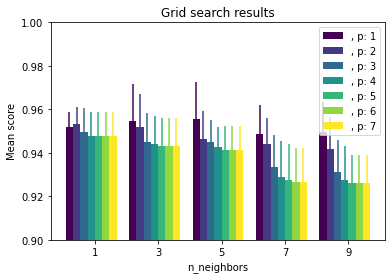

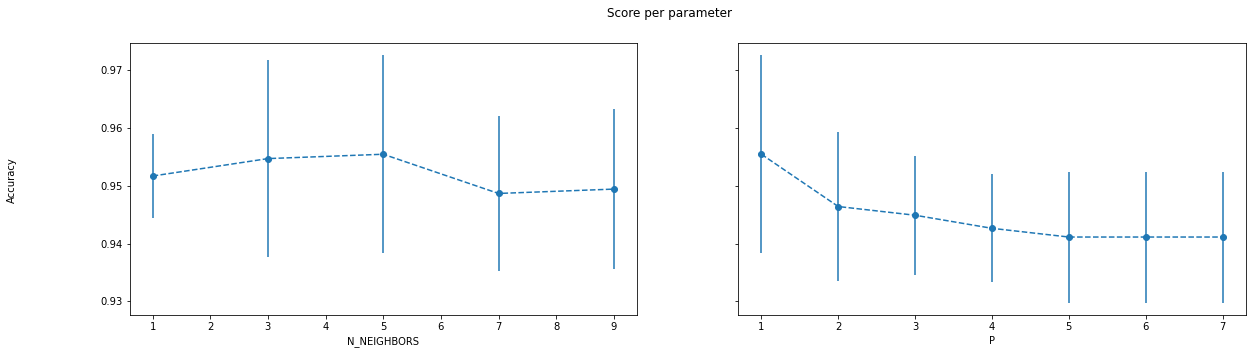

In [97]:
grid_search(pair1_knnModel_fit.cv_results_, change='n_neighbors', kind='bar')
plt.ylim((0.90, 1))
plt.show()

plot_search_results(pair1_knnModel_fit)

### Pair 2 Graph for KNN

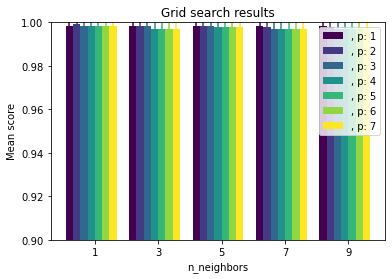

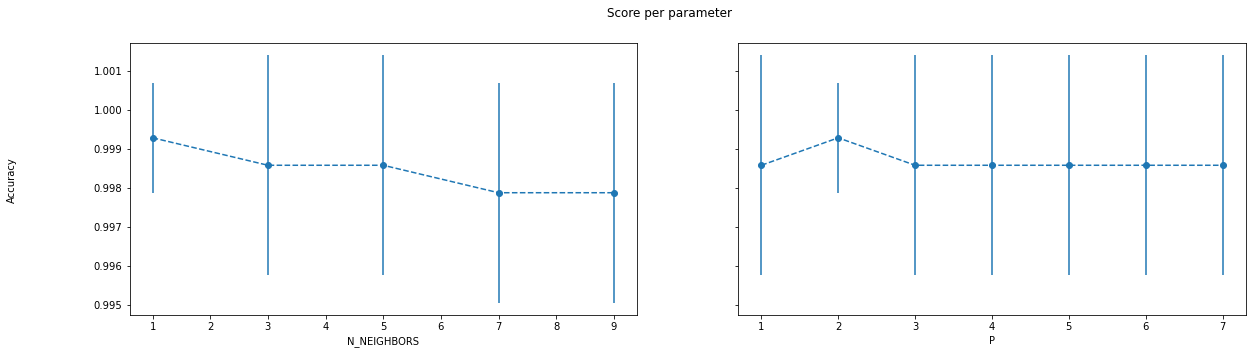

In [93]:
grid_search(pair2_knnModel_fit.cv_results_, change='n_neighbors', kind='bar')
plt.ylim((0.90, 1))
plt.show()

plot_search_results(pair2_knnModel_fit)

### Pair 3 Graph for KNN

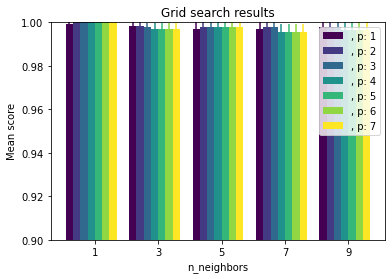

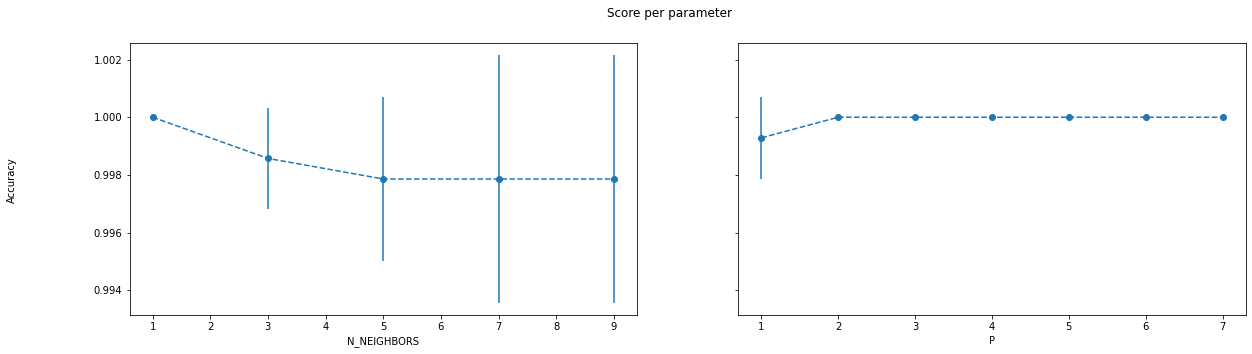

In [94]:
grid_search(pair3_knnModel_fit.cv_results_, change='n_neighbors', kind='bar')
plt.ylim((0.90, 1))
plt.show()

plot_search_results(pair3_knnModel_fit)

## Decision Tree

In [113]:
max_depth = [2,4,6,8,10]
max_features = ['auto', 'sqrt', 'log2']
tune_hyper_1 = dict(max_depth=max_depth, max_features=max_features)

dTreeModel = DecisionTreeClassifier()

pair1_dTreeModel = GridSearchCV(dTreeModel, tune_hyper_1, cv=5)
pair2_dTreeModel = GridSearchCV(dTreeModel, tune_hyper_1, cv=5)
pair3_dTreeModel = GridSearchCV(dTreeModel, tune_hyper_1, cv=5)


pair1_dTreeModel_fit = pair1_dTreeModel.fit(X_pair1_train, y_pair1_train)
print("Result for first set: ", pair1_dTreeModel_fit.best_params_)
print("Score for first set: ", pair1_dTreeModel_fit.best_score_)
print("")
pair2_dTreeModel_fit = pair2_dTreeModel.fit(X_pair2_train, y_pair2_train)
print('Result for second set: ', pair2_dTreeModel_fit.best_params_)
print("Score for first set: ", pair2_dTreeModel_fit.best_score_)
print("")
pair3_dTreeModel_fit = pair3_dTreeModel.fit(X_pair3_train, y_pair3_train)
print('Result for third set: ', pair3_dTreeModel_fit.best_params_)
print("Score for first set: ", pair3_dTreeModel_fit.best_score_)


Result for first set:  {'max_depth': 10, 'max_features': 'auto'}
Score for first set:  0.9252830188679244

Result for second set:  {'max_depth': 10, 'max_features': 'auto'}
Score for first set:  0.9901408450704225

Result for third set:  {'max_depth': 10, 'max_features': 'log2'}
Score for first set:  0.9914183307731695


### Graphs of the cross validation results for Decision Tree

### Pair 1 Graph for Decision Tree

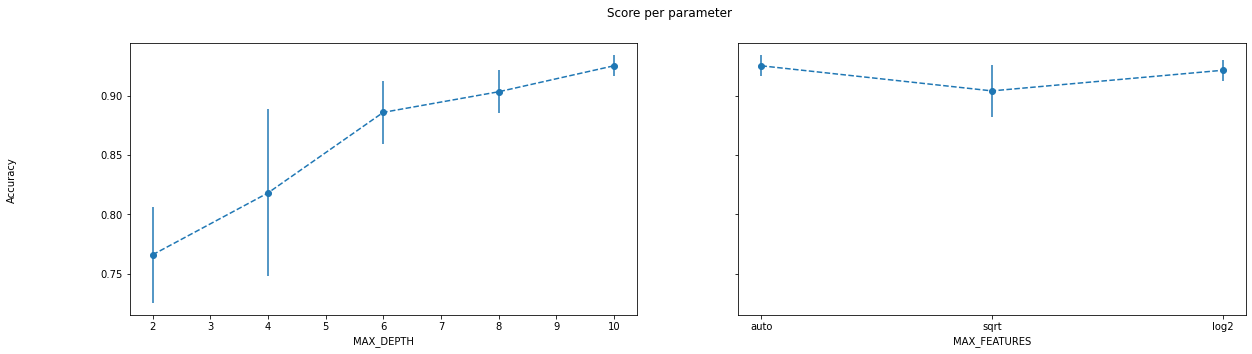

In [114]:
plot_search_results(pair1_dTreeModel)

### Pair 2 Graph for Decision Tree

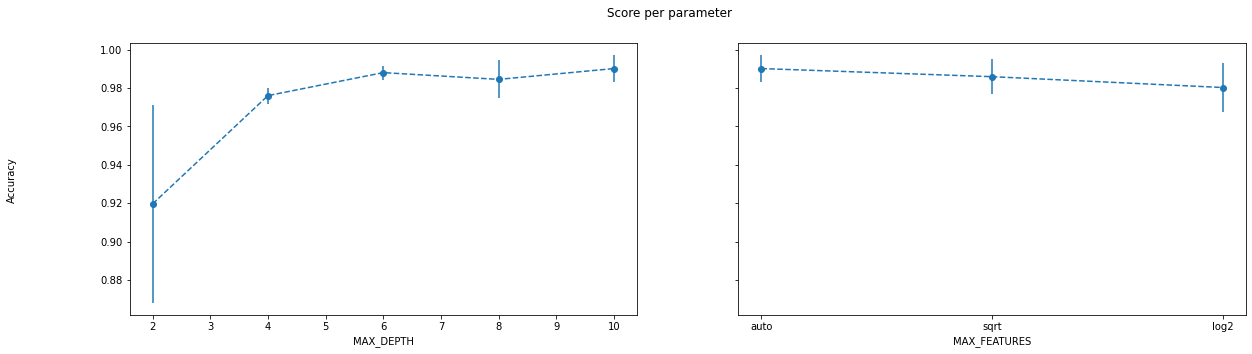

In [115]:
plot_search_results(pair2_dTreeModel)

### Pair 3 Graph for Decision Tree

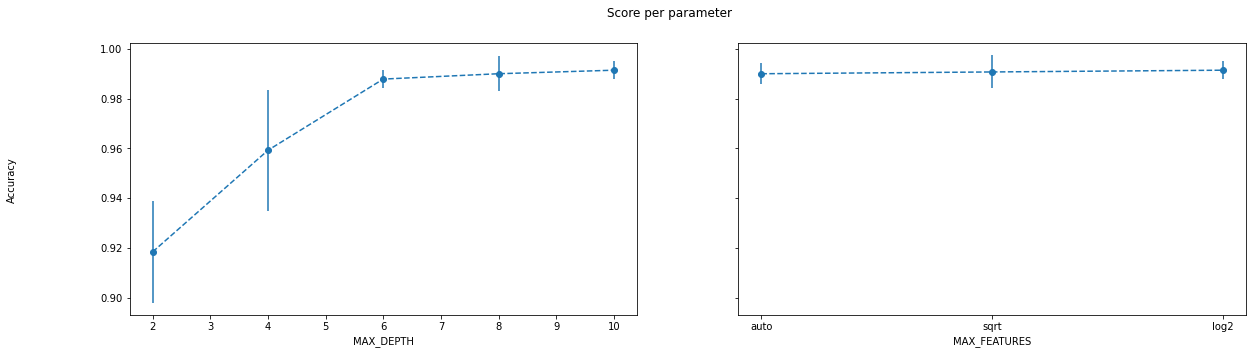

In [116]:
plot_search_results(pair3_dTreeModel)

## Random Forest

In [122]:
n_estimators = [20,40,60,80,100]
max_depth = [4,6,8,10,12]
tune_hyper_2 = dict(n_estimators=n_estimators,max_depth=max_depth)

rForestModel = RandomForestClassifier()

pair1_rForestModel = GridSearchCV(rForestModel, tune_hyper_2, cv=5)
pair2_rForestModel = GridSearchCV(rForestModel, tune_hyper_2, cv=5)
pair3_rForestModel = GridSearchCV(rForestModel, tune_hyper_2, cv=5)

pair1_rForestModel_fit = pair1_rForestModel.fit(X_pair1_train,y_pair1_train)
print('Result for first set: ', pair1_rForestModel_fit.best_params_)
print("Score for first set: ", pair1_rForestModel_fit.best_score_)
print("")
pair2_rForestModel_fit = pair2_rForestModel.fit(X_pair2_train,y_pair2_train)
print('Result for second set: ', pair2_rForestModel_fit.best_params_)
print("Score for second set: ", pair2_rForestModel_fit.best_score_)
print("")
pair3_rForestModel_fit = pair3_rForestModel.fit(X_pair3_train,y_pair3_train)
print('Result for third set: ', pair3_rForestModel_fit.best_params_)
print("Score for third set: ", pair3_rForestModel_fit.best_score_)

Result for first set:  {'max_depth': 10, 'n_estimators': 100}
Score for first set:  0.9705660377358492

Result for second set:  {'max_depth': 8, 'n_estimators': 60}
Score for second set:  0.9985915492957746

Result for third set:  {'max_depth': 6, 'n_estimators': 60}
Score for third set:  1.0


### Graphs of the cross validation results for Random Forest

### Pair 1 Graph for Random Forest

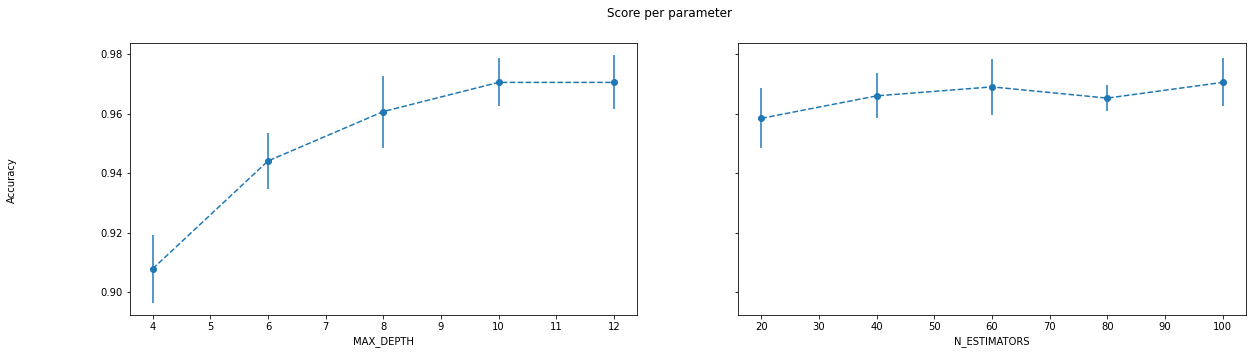

In [123]:
plot_search_results(pair1_rForestModel)

### Pair 2 Graph for Random Forest

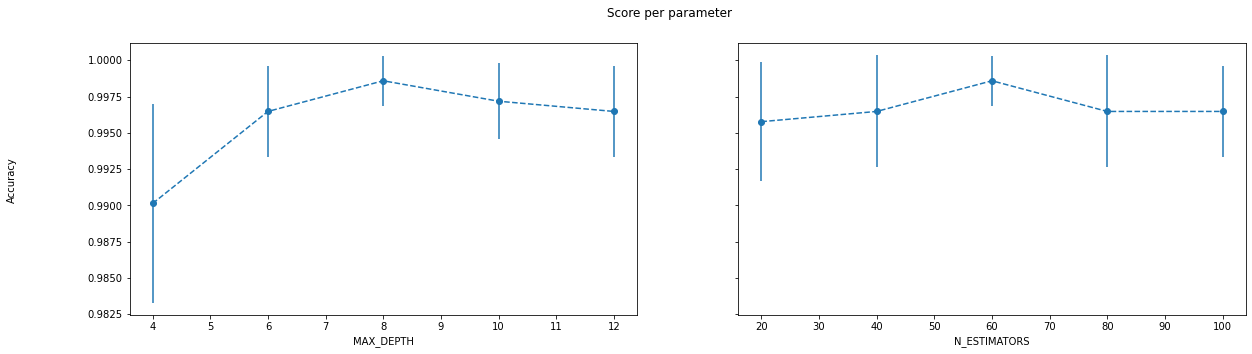

In [124]:
plot_search_results(pair2_rForestModel)

### Pair 3 Graph for Random Forest

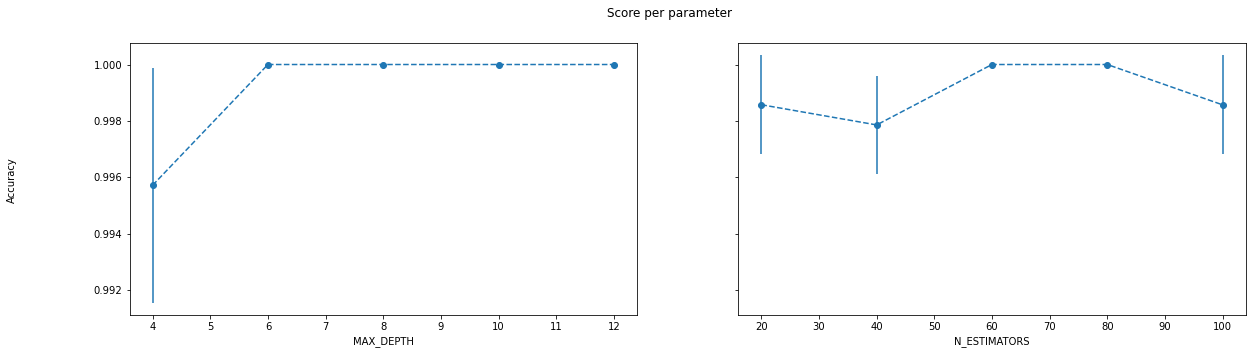

In [125]:
plot_search_results(pair3_rForestModel)

## SVM

In [126]:
kernel = ['rbf']
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
tune_hyper_3 = dict(kernel=kernel, gamma=gamma,C=C)

svmModel = SVC()

pair1_svmModel = GridSearchCV(svmModel, tune_hyper_3, cv=5)
pair2_svmModel = GridSearchCV(svmModel, tune_hyper_3, cv=5)
pair3_svmModel = GridSearchCV(svmModel, tune_hyper_3, cv=5)

pair1_svmModel_fit = pair1_svmModel.fit(X_pair1_train,y_pair1_train)
print('Result for first set:', pair1_svmModel_fit.best_params_)
print("Score for first set: ", pair1_svmModel_fit.best_score_)
print("")
pair2_svmModel_fit = pair2_svmModel.fit(X_pair2_train,y_pair2_train)
print('Result for second set:', pair2_svmModel_fit.best_params_)
print("Score for second set: ", pair2_svmModel_fit.best_score_)
print("")
pair3_svmModel_fit = pair3_svmModel.fit(X_pair3_train,y_pair3_train)
print('Result for third set:', pair3_svmModel_fit.best_params_)
print("Score for third set: ", pair3_svmModel_fit.best_score_)

Result for first set: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score for first set:  0.9818867924528302

Result for second set: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Score for second set:  0.9985915492957746

Result for third set: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Score for third set:  1.0


### Graphs of the cross validation results for SVM

### Pair 1 Graph for SVM

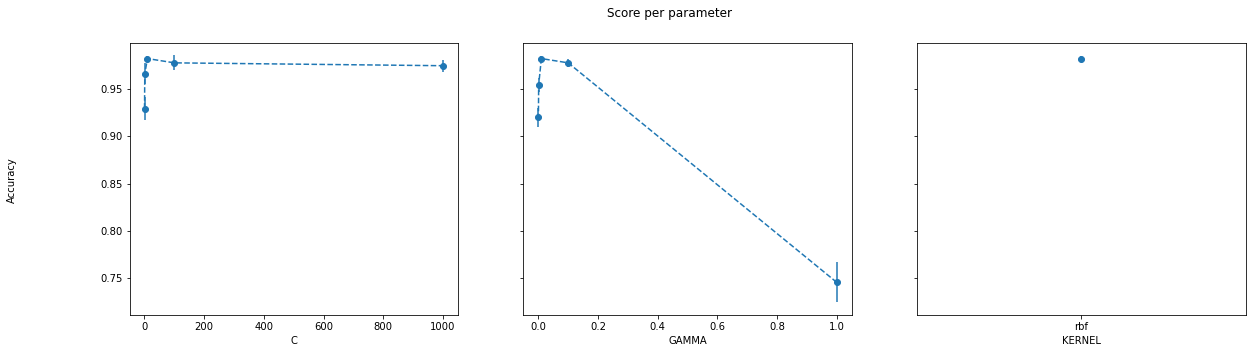

In [129]:
plot_search_results(pair1_svmModel_fit)

### Pair 2 Graph for SVM

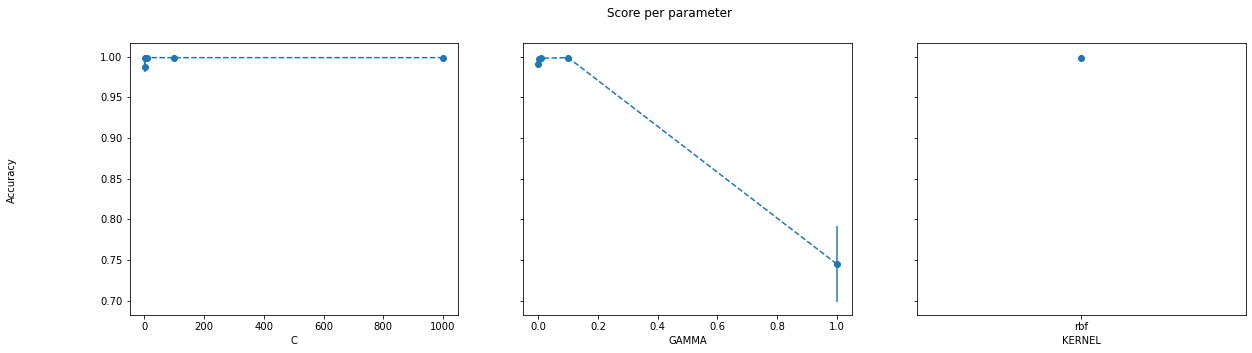

In [130]:
plot_search_results(pair2_svmModel_fit)

### Pair 3 Graph for SVM

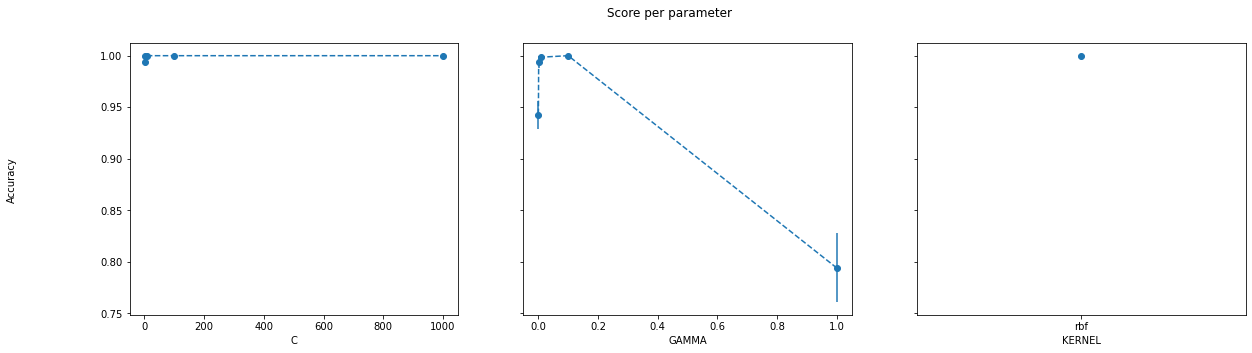

In [131]:
plot_search_results(pair3_svmModel_fit)

## Artifical Neural Network